In [1]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


c:\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [2]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  #epochs.remove(max(epochs))
  
  #rmse.drop(max(rmse))
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


##### Read from file and establish dataframe and future functions

In [3]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df=df.dropna(axis=0, how='all')#drop full nan rows

##### Remove next line to include all data

In [4]:
df=df.iloc[500000:510000] #cuts data to long 120-119 approx
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.9868 37.4636          0.0     -1.2784     -2.4956      1.6396   
          37.4656          0.0     -1.2967     -2.4364      1.7608   
          37.4676          0.0     -1.3893     -2.5015      1.7381   
          37.4696          0.0     -1.4200     -2.5705      1.5793   
          37.4736          0.0     -1.3715     -2.6436      1.5155   
...                        ...         ...         ...         ...   
-119.9708 34.8649          0.0    -11.4450     -3.3825         NaN   
          34.8669          0.0    -11.2040     -3.2146         NaN   
          34.8689          0.0    -11.2030     -3.2806         NaN   
          34.8709          0.0    -11.1980     -3.1953         NaN   
          34.8729          0.0    -11.5350     -3.2133         NaN   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.9868 37.4636      -3.4272     -3.0192   -0.143220    -0.15121   
          37.4656      -3.2960     -2.9787   -0.353610    -0.28092   
          37.4676      -3.3539     -3.0604    0.264930    -0.33472   
          37.4696      -3.4698     -3.1375    0.222760    -0.39693   
          37.4736      -3.5249     -3.1554   -0.000041    -0.50937   
...                        ...         ...         ...         ...   
-119.9708 34.8649      -4.9253     -4.5063   -4.917000    -3.29450   
          34.8669      -4.9133     -4.5348   -4.885000    -3.30700   
          34.8689      -4.8860     -4.6360   -5.093400    -3.35050   
          34.8709      -4.8558     -4.5704   -5.025000    -3.39710   
          34.8729      -4.8518     -4.5740   -5.133700    -3.69220   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-119.9868 37.4636      0.42195    0.331640  ...     -2.6505    -0.40585   
          37.4656      0.22919    0.136510  ...     -1.3831     0.84848   
          37.4676      0.26265    0.094916  ...     -1.7415     0.46932   
          37.4696      0.27318   -0.019488  ...     -3.0374    -0.77593   
          37.4736      0.22820   -0.021666  ...     -2.9338    -0.64350   
...                        ...         ...  ...         ...         ...   
-119.9708 34.8649     -0.31252    2.263000  ...     -9.0249    -5.18290   
          34.8669     -0.26973    2.225200  ...     -8.4071    -4.54780   
          34.8689     -0.34012    2.010100  ...     -8.7234    -4.78290   
          34.8709     -0.29776    1.988800  ...     -9.0169    -5.12200   
          34.8729     -0.55786    1.771700  ...     -8.8380    -5.00030   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-119.9868 37.4636    -0.873980    -0.62487    -0.62831     -2.7438   
          37.4656     0.397970     0.66435     0.58809     -1.4466   
          37.4676     0.039278     0.30771     0.25464     -1.7407   
          37.4696    -1.202800    -1.00970    -0.87614     -2.9296   
          37.4736    -1.039700    -0.88239    -0.74674     -2.7335   
...                        ...         ...         ...         ...   
-119.9708 34.8649    -7.914500   -10.33900    -6.01470     -8.8671   
          34.8669    -7.335600    -9.74180    -5.39680     -8.2295   
          34.8689    -7.580600   -10.08000    -5.70510     -8.5641   
          34.8709    -7.889900   -10.34400    -6.02340     -8.9698   
          34.8729    -7.686700   -10.11800    -6.01480     -8.9459   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-119.9868 37.4636      -2.5164    -2.33220   -0.067227     0.78007  
          37.4656      -1.1572    -0.87407    1.325500     2.34450  
          37.4676      -1.4324    -

# Timestep

In [5]:
timestep=10

# Shaping function (remove start and step for first for loop to include all data)

In [6]:
def shaping(datain, timestep):
    #print(arr)
    cnt=0
    
    for row in range(0,len(datain.index),1750): #picks a row at every iteration, allows to reduction of input and inclusion of multiple time series, remove start and step to run on full dataset 
    # Convert input dataframe to array and flatten
        arr=datain.iloc[row].to_numpy().flatten() # flatten row
         #Find indices that you need to replace
        arr=np.where(np.isnan(arr), ma.array(arr, mask=np.isnan(arr)).mean(), arr) 
        #arr[np.isnan(arr)] = 
        for mth in range(0, len(datain.columns)-(2*timestep)+1): # Define range lenght of the dates - 2* amount of timesep?? +1
            cnt=cnt+1 # Gives us the number of samples. Later used to reshape the data
            X_start=mth # Start month for inputs of each sample
            X_end=mth+timestep # End month for inputs of each sample
            Y_start=mth+timestep # Start month for targets of each sample. Note, start is inclusive and end is exclusive, that's why X_end and Y_start is the same number
            Y_end=mth+2*timestep # End month for targets of each sample.  
            
            # Assemble input and target arrays containing all samples
            if cnt==1:
                X_comb=arr[X_start:X_end]
                Y_comb=arr[Y_start:Y_end]
            else: 
                X_comb=np.append(X_comb, arr[X_start:X_end])
                Y_comb=np.append(Y_comb, arr[Y_start:Y_end])
    
    # Reshape input and target arrays
    X_out=np.reshape(X_comb, (cnt, timestep, 1))
    Y_out=np.reshape(Y_comb, (cnt, timestep, 1))
    return X_out, Y_out

##### Step 2 - Split and Shape data

In [7]:
#train, test = train_test_split(df, test_size=0.2)
# creates sequences to train
#Need to decide on how to deal with rows with nans in them
X , Y = shaping(datain=df, timestep= timestep )
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=28)
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_train.shape
Y_train = Y_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_test.shape
Y_test = Y_test.reshape((nsamples,nx*ny))

##### Step 3 - Specify the structure of a Neural Network, first model

c:\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


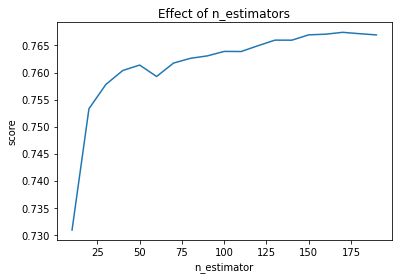

In [8]:
# set model
model = RandomForestRegressor(n_jobs = -1, random_state = 64)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)



In [20]:
# gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
#                           param_grid={
#                               'n_estimators': [50, 100, 250, 300],
#                               'max_depth': [None, 100, 200, 300, 400]
#                           },
#                           cv=3,
#                           return_train_score=False,
#                           scoring='r2')
# gridsearch.fit(X=X_train, y=Y_train)
# pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

Scores:Return the coefficient of determination of the prediction. R^2

In [12]:
scores

[0.7308860971432706,
 0.7533009198186259,
 0.7577924402896338,
 0.7603733035421939,
 0.7613763874496879,
 0.759265383819426,
 0.761741459441776,
 0.762623146786054,
 0.7630716394590563,
 0.7639014413735072,
 0.7638811741765037,
 0.7649567488026385,
 0.7659842438291871,
 0.7659778365804434,
 0.7669629605000295,
 0.7670847295045877,
 0.7674264575631597,
 0.7671779391434377,
 0.7669485461401526]

##### Train model

##### Step 4 - Plot loss over epochs

In [13]:
# Predicting the target values of the test set
Y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



RMSE:  1.842
Mean Absolute Error: 1.3886184830458004
Mean Squared Error: 3.394261148680317
Root Mean Squared Error: 1.8423520696870936


In [ ]:
# Calculate the absolute errors
errors = abs(Y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.61 degrees.
Accuracy: 75.93 %.


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


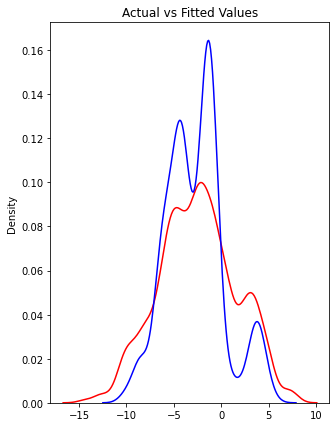

In [14]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
##### Step 5 - Print Performance Summary